In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd drive/

/content/drive


In [3]:
ls

'My Drive'/


In [4]:
cd My\ Drive

/content/drive/My Drive


In [5]:
ls

 원자력_분석/   제출4.csv           DOG_Reco/             submission.csv
 제출1.csv      제출5.csv           jeju/                 전소윤_프로젝트.zip
 제출2.csv     'Colab Notebooks'/   optical/
 제출3.csv      deep/               submission_1620.csv


In [6]:
cd DOG_Reco/

/content/drive/My Drive/DOG_Reco


In [7]:
ls

dog_img_species/  dog_recognition.ipynb  numpy_data/


In [8]:

from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split

In [9]:
ls

dog_img_species/  dog_recognition.ipynb  numpy_data/


In [10]:
caltech_dir = "./dog_img_species"
categories = ["pomeranian", "maltese", "chihuahua", "toy_poodle",'goden_retriever']
nb_classes = len(categories)

In [11]:
image_w = 64
image_h = 64

In [12]:
pixels = image_h * image_w * 3

X = []
y = []

for idx, cat in enumerate(categories):
    
    #one-hot 돌리기.
    label = [0 for i in range(nb_classes)]
    label[idx] = 1

    image_dir = caltech_dir + "/" + cat
    files = glob.glob(image_dir+"/*.jpg")
    print(cat, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(label)

        if i % 700 == 0:
            print(cat, " : ", f)


pomeranian  파일 길이 :  219
pomeranian  :  ./dog_img_species/pomeranian/n02112018_3090.jpg
maltese  파일 길이 :  252
maltese  :  ./dog_img_species/maltese/n02085936_1424.jpg
chihuahua  파일 길이 :  152
chihuahua  :  ./dog_img_species/chihuahua/n02085620_3928.jpg
toy_poodle  파일 길이 :  151
toy_poodle  :  ./dog_img_species/toy_poodle/n02113624_2270.jpg
goden_retriever  파일 길이 :  150
goden_retriever  :  ./dog_img_species/goden_retriever/n02099601_3738.jpg


In [13]:

X = np.array(X)
y = np.array(y)


X_train, X_test, y_train, y_test = train_test_split(X, y)
xy = (X_train, X_test, y_train, y_test)
np.save("./numpy_data/multi_image_data.npy", xy)

print("ok", len(y))

ok 924


In [ ]:
! pip uninstall keras --yes


In [13]:
! pip install Keras==2.2.0

     |████████████████████████████████| 307kB 2.8MB/s 
     |████████████████████████████████| 51kB 5.3MB/s 
ERROR: tensorflow 2.3.0 has requirement keras-preprocessing<1.2,>=1.1.1, but you'll have keras-preprocessing 1.0.1 which is incompatible.
  Found existing installation: Keras-Preprocessing 1.1.2
    Uninstalling Keras-Preprocessing-1.1.2:
      Successfully uninstalled Keras-Preprocessing-1.1.2
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [23]:
 pip install tensorflow==1.4

     |████████████████████████████████| 41.2MB 113kB/s 
     |████████████████████████████████| 1.7MB 50.2MB/s 
     |████████████████████████████████| 890kB 47.0MB/s 
  Created wheel for html5lib: filename=html5lib-0.9999999-cp36-none-any.whl size=107220 sha256=7f235a82fa659bdcf22632da1ebcb441a2e28d4282fa3cd016823706843aba77
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 3.1.5
    Uninstalling bleach-3.1.5:
      Successfully uninstalled bleach-3.1.5
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import keras.backend.tensorflow_backend as K

import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)


X_train, X_test, y_train, y_test = np.load('./numpy_data/multi_image_data.npy')
print(X_train.shape)
print(X_train.shape[0])

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:520: FutureWarn

(693, 64, 64, 3)
693


In [15]:
categories = ["pomeranian", "maltese", "chihuahua", "toy_poodle",'goden_retriever']
nb_classes = len(categories)

#일반화
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [48]:
with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
    model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))


    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './model'
    
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    
    model_path = model_dir + '/multi_img_classification.model'
    checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)


In [22]:
! pip install tensorflow==1.6

     |████████████████████████████████| 45.9MB 92kB/s 
     |████████████████████████████████| 3.1MB 40.3MB/s 
ERROR: tensorflow-gpu 2.3.0 has requirement tensorboard<3,>=2.3.0, but you'll have tensorboard 1.6.0 which is incompatible.
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [49]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 128)       73856     
__________

In [50]:
#데이터셋이 적어서 validation을 그냥 test 데이터로 했습니다. 
#데이터셋이 충분하시면 이렇게 하시지 마시고 validation_split=0.2 이렇게 하셔서 테스트 셋으로 나누시길 권장합니다.
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stopping])

Train on 693 samples, validate on 231 samples
Epoch 1/50
693/693 [==============================] - 19s 27ms/step - loss: 1.6228 - acc: 0.2323 - val_loss: 1.5980 - val_acc: 0.2771

Epoch 00001: val_loss improved from inf to 1.59797, saving model to ./model/multi_img_classification.model
Epoch 2/50
693/693 [==============================] - 17s 24ms/step - loss: 1.5882 - acc: 0.2583 - val_loss: 1.5739 - val_acc: 0.2771

Epoch 00002: val_loss improved from 1.59797 to 1.57386, saving model to ./model/multi_img_classification.model
Epoch 3/50
693/693 [==============================] - 17s 24ms/step - loss: 1.5462 - acc: 0.2828 - val_loss: 1.5159 - val_acc: 0.3723

Epoch 00003: val_loss improved from 1.57386 to 1.51590, saving model to ./model/multi_img_classification.model
Epoch 4/50
693/693 [==============================] - 17s 24ms/step - loss: 1.4922 - acc: 0.3434 - val_loss: 1.5727 - val_acc: 0.2987

Epoch 00004: val_loss did not improve from 1.51590
Epoch 5/50
693/693 [==============

In [51]:
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

231/231 [==============================] - 2s 7ms/step
정확도 : 0.4286


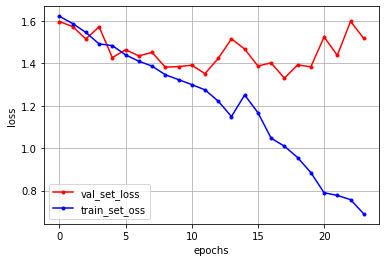

In [52]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

In [53]:
from keras.models import load_model

model.save('dog_recog_model.h5')

In [54]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model

caltech_dir = "./img_other_test"
image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
filenames = []
files = glob.glob(caltech_dir+"/*.*")
for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)

X = np.array(X)
model = load_model('./model/multi_img_classification.model')

prediction = model.predict(X)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
cnt = 0

#이 비교는 그냥 파일들이 있으면 해당 파일과 비교. 카테고리와 함께 비교해서 진행하는 것은 _4 파일.
for i in prediction:
    pre_ans = i.argmax()  # 예측 레이블
    print(i)
    print(pre_ans)
    pre_ans_str = ''
    if pre_ans == 0: pre_ans_str = "포메"
    elif pre_ans == 1: pre_ans_str = "말티즈"
    elif pre_ans == 2: pre_ans_str = "치와와"
    elif pre_ans == 3: pre_ans_str = "토이푸들"
    else: pre_ans_str = "골든리트리버"
    if i[0] >= 0.8 : print("해당 "+filenames[cnt].split("/")[2]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[1] >= 0.8: print("해당 "+filenames[cnt].split("/")[2]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[2] >= 0.8: print("해당 "+filenames[cnt].split("/")[2]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    #print(filenames[cnt].split("/"))
    if i[3] >= 0.8: print("해당 "+filenames[cnt].split("/")[2]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[4] >= 0.8: print("해당 "+filenames[cnt].split("/")[2]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    cnt += 1
    # print(i.argmax()) #얘가 레이블 [1. 0. 0.] 이런식으로 되어 있는 것을 숫자로 바꿔주는 것.
    # 즉 얘랑, 나중에 카테고리 데이터 불러와서 카테고리랑 비교를 해서 같으면 맞는거고, 아니면 틀린거로 취급하면 된다.
    # 이걸 한 것은 _4.py에.


[0.000 0.000 0.000 0.000 1.000]
4
해당 포메1.png이미지는 골든리트리버으로 추정됩니다.
[0.000 0.000 0.000 0.003 0.997]
4
해당 골리1.jpg이미지는 골든리트리버으로 추정됩니다.
[0.000 1.000 0.000 0.000 0.000]
1
해당 말티즈.jpg이미지는 말티즈으로 추정됩니다.


In [55]:
ls

dog_img_species/    dog_recognition.ipynb  model/
dog_recog_model.h5  img_other_test/        numpy_data/


In [56]:
cd ..

/content/drive/My Drive


In [57]:
ls

 원자력_분석/   제출4.csv           DOG_Reco/             submission.csv
 제출1.csv      제출5.csv           jeju/                 전소윤_프로젝트.zip
 제출2.csv     'Colab Notebooks'/   optical/
 제출3.csv      deep/               submission_1620.csv


In [58]:
cd DOG_Reco/

/content/drive/My Drive/DOG_Reco
